In [30]:
! pip install pandas
! pip install numpy
! pip install seaborn
! pip install matplotlib
! pip install scikit-learn
! pip install tensorflow




^C


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

In [ ]:
data = pd.read_csv("../dataset/merged_file.csv")
data.head()

,YEAR,MO,DY,HR,QV2M,RH2M,PRECTOTCORR,PS,WS50M,WD50M
0,2014,1,30,2,5.49,77.56,0.0,98.82,1.48,234.04
1,2014,1,30,3,5.49,77.38,0.0,98.87,1.16,232.13
2,2014,1,30,4,5.49,76.94,0.0,98.92,0.60,236.73
3,2014,1,30,5,5.37,75.94,0.0,98.97,0.17,76.61
4,2014,1,30,6,5.37,80.50,0.0,99.04,1.13,87.24


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87624 entries, 0 to 87623
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         87624 non-null  int64  
 1   MO           87624 non-null  int64  
 2   DY           87624 non-null  int64  
 3   HR           87624 non-null  int64  
 4   QV2M         87624 non-null  float64
 5   RH2M         87624 non-null  float64
 6   PRECTOTCORR  87624 non-null  float64
 7   PS           87624 non-null  float64
 8   WS50M        87624 non-null  float64
 9   WD50M        87624 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 6.7 MB


In [ ]:
data.describe()

,YEAR,MO,DY,HR,QV2M,RH2M,PRECTOTCORR,PS,WS50M,WD50M
count,87624.000000,87624.000000,87624.000000,87624.000000,87624.000000,87624.000000,87624.000000,87624.000000,87624.000000,87624.00000
mean,2018.577878,6.525062,15.724162,11.500000,7.539688,63.238715,0.071239,98.392801,4.885299,154.21860
std,2.883656,3.447813,8.797801,6.922226,2.484511,24.618245,0.319656,0.543349,2.450638,118.46267
min,2014.000000,1.000000,1.000000,0.000000,1.650000,6.250000,0.000000,95.890000,0.020000,0.00000
25%,2016.000000,4.000000,8.000000,5.750000,5.800000,43.810000,0.000000,98.000000,3.090000,37.88750
50%,2019.000000,7.000000,16.000000,11.500000,7.570000,65.120000,0.000000,98.350000,4.570000,150.90500
75%,2021.000000,10.000000,23.000000,17.250000,9.220000,84.940000,0.000000,98.750000,6.370000,260.78250
max,2024.000000,12.000000,31.000000,23.000000,17.090000,100.000000,11.840000,100.430000,19.080000,359.96000


In [ ]:
data.isnull().sum()

YEAR           0
MO             0
DY             0
HR             0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS50M          0
WD50M          0
dtype: int64

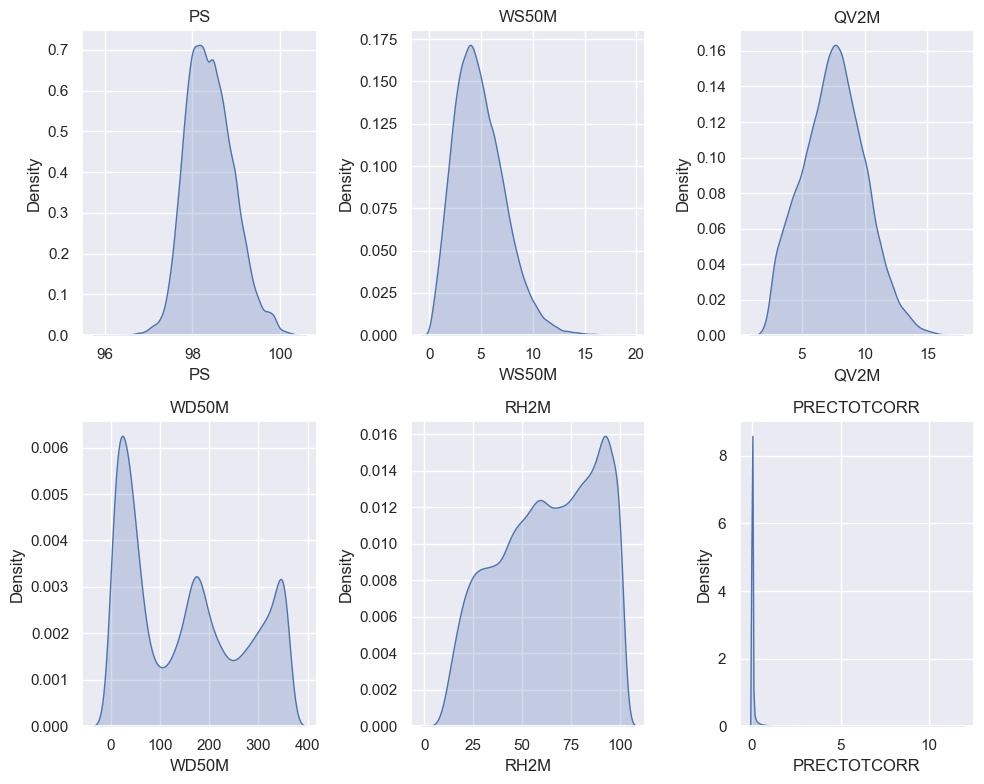

In [ ]:
target_columns = ["PS", "WS50M", "QV2M", "WD50M", "RH2M", "PRECTOTCORR"]

# Create the plot
plt.figure(figsize=(10, 8))

# Get the number of subplots needed
num_subplots = len(target_columns)

# Loop through and plot each column
for i, col in enumerate(target_columns):
    # Create the subplot
    plt.subplot(2, 3, i + 1)  # Adjust the number of columns based on your preference

    # Plot the kernel density distribution
    sns.kdeplot(data[col], fill=True)

    # Set the title
    plt.title(col)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# droping all the null values from the data
data = data.dropna()

In [ ]:


# Assuming you have a DataFrame named 'data' with columns YEAR, MO, DY, and HR
data["Date/Time"] = pd.to_datetime(data["YEAR"].astype(str) + '-' + data["MO"].astype(str) + '-' + data["DY"].astype(str) + ' ' + data["HR"].astype(str), errors="coerce", format="%Y-%m-%d %H")

data = data.drop(columns=["YEAR", "MO", "DY", "HR"])
print(data)


       QV2M    RH2M  PRECTOTCORR     PS  WS50M   WD50M           Date/Time
0      5.49   77.56          0.0  98.82   1.48  234.04 2014-01-30 02:00:00
1      5.49   77.38          0.0  98.87   1.16  232.13 2014-01-30 03:00:00
2      5.49   76.94          0.0  98.92   0.60  236.73 2014-01-30 04:00:00
3      5.37   75.94          0.0  98.97   0.17   76.61 2014-01-30 05:00:00
4      5.37   80.50          0.0  99.04   1.13   87.24 2014-01-30 06:00:00
...     ...     ...          ...    ...    ...     ...                 ...
87619  3.85   87.31          0.0  99.56   9.02   19.63 2024-01-28 21:00:00
87620  3.85   90.00          0.0  99.55   8.81   20.46 2024-01-28 22:00:00
87621  3.85   92.19          0.0  99.56   8.55   21.10 2024-01-28 23:00:00
87622  3.78   96.75          0.0  99.55   7.83   20.55 2024-01-29 00:00:00
87623  3.78  100.00          0.0  99.57   7.41   18.32 2024-01-29 01:00:00

[87624 rows x 7 columns]


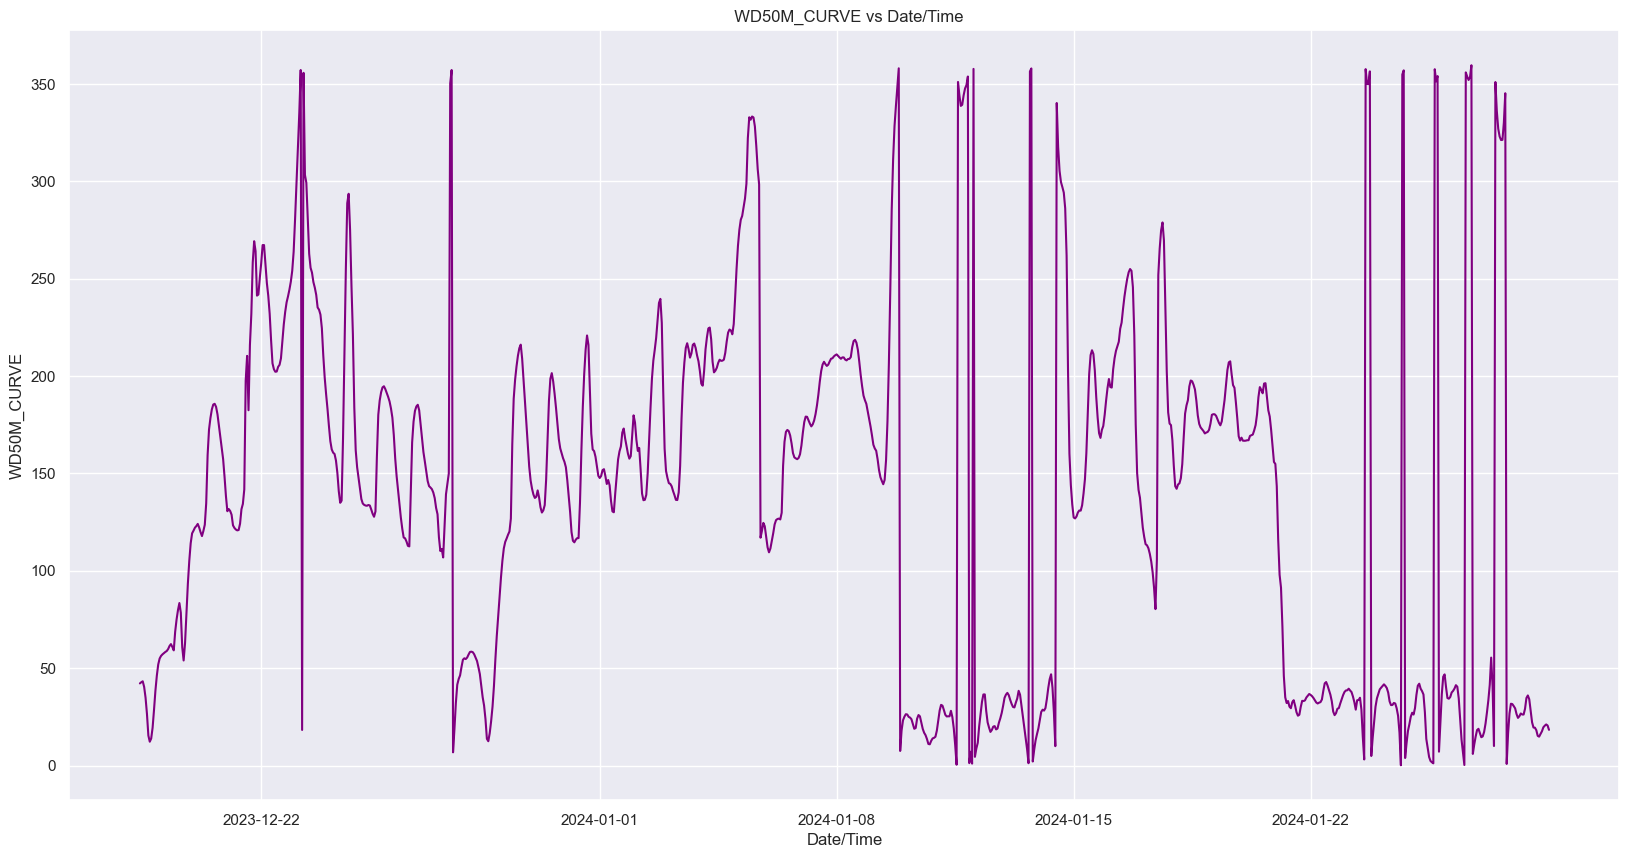

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis, considering the last 1000 data points
ax.plot(data['Date/Time'][-1000:],
        data['WD50M'][-1000:],
        color='purple')

# Set title and labels for axes
ax.set(ylabel="WD50M_CURVE",
       xlabel="Date/Time",
       title="  WD50M_CURVE vs Date/Time")

plt.show()


In [ ]:
# Droping all the irrelavent features that dosent affect the target variable.

data.tail()

,QV2M,RH2M,PRECTOTCORR,PS,WS50M,WD50M,Date/Time
87619,3.85,87.31,0.0,99.56,9.02,19.63,2024-01-28 21:00:00
87620,3.85,90.00,0.0,99.55,8.81,20.46,2024-01-28 22:00:00
87621,3.85,92.19,0.0,99.56,8.55,21.10,2024-01-28 23:00:00
87622,3.78,96.75,0.0,99.55,7.83,20.55,2024-01-29 00:00:00
87623,3.78,100.00,0.0,99.57,7.41,18.32,2024-01-29 01:00:00


In [ ]:
df1 = data.copy()

print(df1)

       QV2M    RH2M  PRECTOTCORR     PS  WS50M   WD50M           Date/Time
0      5.49   77.56          0.0  98.82   1.48  234.04 2014-01-30 02:00:00
1      5.49   77.38          0.0  98.87   1.16  232.13 2014-01-30 03:00:00
2      5.49   76.94          0.0  98.92   0.60  236.73 2014-01-30 04:00:00
3      5.37   75.94          0.0  98.97   0.17   76.61 2014-01-30 05:00:00
4      5.37   80.50          0.0  99.04   1.13   87.24 2014-01-30 06:00:00
...     ...     ...          ...    ...    ...     ...                 ...
87619  3.85   87.31          0.0  99.56   9.02   19.63 2024-01-28 21:00:00
87620  3.85   90.00          0.0  99.55   8.81   20.46 2024-01-28 22:00:00
87621  3.85   92.19          0.0  99.56   8.55   21.10 2024-01-28 23:00:00
87622  3.78   96.75          0.0  99.55   7.83   20.55 2024-01-29 00:00:00
87623  3.78  100.00          0.0  99.57   7.41   18.32 2024-01-29 01:00:00

[87624 rows x 7 columns]


In [ ]:



from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [ ]:
df1 = df1.set_index('Date/Time')


In [ ]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [ ]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised1(data, lag=1):
    df1 = DataFrame(data)
    columns = [df1.shift(i) for i in range(1, lag+1)]
    columns.append(df1)
    df1 = concat(columns, axis=1)
    df1.fillna(0, inplace=True)
    return df1

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [ ]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [ ]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [ ]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    model = tf.keras.models.Sequential()
    
    # Use LSTM layer with CuDNN backend if available
    if tf.test.is_gpu_available(cuda_only=True):
        model.add(tf.keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    else:
        model.add(tf.keras.layers.LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True, implementation=2))
    
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    
    # Print model summary after training
    print(model.summary())
    
    return model

In [ ]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [ ]:
'''Drop all the features as we will not be having any in production'''
del df1['QV2M']
del df1['RH2M']
del df1['PRECTOTCORR']
del df1['PS']
del df1['WS50M']
df1.head()





,WD50M
Date/Time,
2014-01-30 02:00:00,234.04
2014-01-30 03:00:00,232.13
2014-01-30 04:00:00,236.73
2014-01-30 05:00:00,76.61
2014-01-30 06:00:00,87.24


In [ ]:
for i in range(0,10):
  df1 = df1[:-1]
df1.tail()

,WD50M
Date/Time,
2024-01-28 11:00:00,34.04
2024-01-28 12:00:00,28.28
2024-01-28 13:00:00,22.20
2024-01-28 14:00:00,19.51
2024-01-28 15:00:00,19.43


In [27]:
# transform data to be stationary
raw_values = df1.values
diff_values = difference(raw_values, 1)

In [28]:
print(diff_values)

0         [-1.9099999999999966]
1           [4.599999999999994]
2                     [-160.12]
3          [10.629999999999995]
4           [7.650000000000006]
                  ...          
87608     [-1.9500000000000028]
87609      [-5.759999999999998]
87610      [-6.080000000000002]
87611     [-2.6899999999999977]
87612    [-0.08000000000000185]
Length: 87613, dtype: object


In [27]:
# transform data to be supervised learning
supervised = timeseries_to_supervised1(diff_values, lag_exp)
supervised_values = supervised.values

In [28]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [29]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [30]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


86613/86613 [==============================] - 310s 4ms/step - loss: 0.0326
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense (Dense)               (1, 1)                    11        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [31]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 1s 1s/step
Hour=1, Predicted=-56.404250, Expected=39.970000
1/1 [==============================] - 0s 39ms/step
Hour=2, Predicted=107.980227, Expected=42.180000
1/1 [==============================] - 0s 40ms/step
Hour=3, Predicted=15.645010, Expected=43.660000
1/1 [==============================] - 0s 45ms/step
Hour=4, Predicted=41.817613, Expected=44.730000
1/1 [==============================] - 0s 39ms/step
Hour=5, Predicted=42.339980, Expected=45.440000
1/1 [==============================] - 0s 39ms/step
Hour=6, Predicted=38.768604, Expected=45.400000
1/1 [==============================] - 0s 36ms/step
Hour=7, Predicted=45.599238, Expected=46.460000
1/1 [==============================] - 0s 66ms/step
Hour=8, Predicted=44.951621, Expected=48.210000
1/1 [==============================] - 0s 42ms/step
Hour=9, Predicted=50.426643, Expected=48.560000
1/1 [==============================] - 0s 41ms/step
Hour=10, Predicted=51.862269, Expected=43.110000

1/1 [==============================] - 0s 43ms/step
Hour=82, Predicted=119.768205, Expected=124.210000
1/1 [==============================] - 0s 39ms/step
Hour=83, Predicted=123.650662, Expected=131.640000
1/1 [==============================] - 0s 38ms/step
Hour=84, Predicted=130.336287, Expected=134.360000
1/1 [==============================] - 0s 46ms/step
Hour=85, Predicted=133.824490, Expected=141.790000
1/1 [==============================] - 0s 36ms/step
Hour=86, Predicted=140.613073, Expected=197.650000
1/1 [==============================] - 0s 42ms/step
Hour=87, Predicted=197.130299, Expected=210.380000
1/1 [==============================] - 0s 34ms/step
Hour=88, Predicted=209.498769, Expected=182.470000
1/1 [==============================] - 0s 45ms/step
Hour=89, Predicted=181.982549, Expected=216.050000
1/1 [==============================] - 0s 39ms/step
Hour=90, Predicted=215.535204, Expected=231.940000
1/1 [==============================] - 0s 35ms/step
Hour=91, Predicted=23

1/1 [==============================] - 0s 44ms/step
Hour=161, Predicted=274.812972, Expected=246.210000
1/1 [==============================] - 0s 53ms/step
Hour=162, Predicted=245.838420, Expected=221.460000
1/1 [==============================] - 0s 56ms/step
Hour=163, Predicted=221.068639, Expected=183.790000
1/1 [==============================] - 0s 33ms/step
Hour=164, Predicted=183.399101, Expected=161.910000
1/1 [==============================] - 0s 46ms/step
Hour=165, Predicted=161.485821, Expected=153.210000
1/1 [==============================] - 0s 39ms/step
Hour=166, Predicted=152.807538, Expected=147.780000
1/1 [==============================] - 0s 38ms/step
Hour=167, Predicted=147.340184, Expected=142.130000
1/1 [==============================] - 0s 41ms/step
Hour=168, Predicted=141.724873, Expected=136.860000
1/1 [==============================] - 0s 47ms/step
Hour=169, Predicted=136.423111, Expected=134.580000
1/1 [==============================] - 0s 32ms/step
Hour=170, Pr

1/1 [==============================] - 0s 29ms/step
Hour=240, Predicted=50.244682, Expected=54.320000
1/1 [==============================] - 0s 33ms/step
Hour=241, Predicted=53.971150, Expected=55.070000
1/1 [==============================] - 0s 38ms/step
Hour=242, Predicted=54.721214, Expected=54.680000
1/1 [==============================] - 0s 45ms/step
Hour=243, Predicted=54.327665, Expected=55.440000
1/1 [==============================] - 0s 37ms/step
Hour=244, Predicted=55.086658, Expected=56.990000
1/1 [==============================] - 0s 33ms/step
Hour=245, Predicted=56.633822, Expected=58.330000
1/1 [==============================] - 0s 29ms/step
Hour=246, Predicted=57.972015, Expected=58.470000
1/1 [==============================] - 0s 48ms/step
Hour=247, Predicted=58.110364, Expected=58.210000
1/1 [==============================] - 0s 47ms/step
Hour=248, Predicted=57.848198, Expected=57.120000
1/1 [==============================] - 0s 36ms/step
Hour=249, Predicted=56.757861,

1/1 [==============================] - 0s 37ms/step
Hour=319, Predicted=115.065033, Expected=114.630000
1/1 [==============================] - 0s 34ms/step
Hour=320, Predicted=114.275135, Expected=115.970000
1/1 [==============================] - 0s 31ms/step
Hour=321, Predicted=115.615258, Expected=116.770000
1/1 [==============================] - 0s 37ms/step
Hour=322, Predicted=116.415173, Expected=116.800000
1/1 [==============================] - 0s 27ms/step
Hour=323, Predicted=116.445205, Expected=135.000000
1/1 [==============================] - 0s 32ms/step
Hour=324, Predicted=134.644990, Expected=161.820000
1/1 [==============================] - 0s 33ms/step
Hour=325, Predicted=161.464894, Expected=184.210000
1/1 [==============================] - 0s 36ms/step
Hour=326, Predicted=183.854610, Expected=201.160000
1/1 [==============================] - 0s 32ms/step
Hour=327, Predicted=200.804433, Expected=213.540000
1/1 [==============================] - 0s 44ms/step
Hour=328, Pr

1/1 [==============================] - 0s 33ms/step
Hour=398, Predicted=206.523859, Expected=214.440000
1/1 [==============================] - 0s 29ms/step
Hour=399, Predicted=214.083918, Expected=216.870000
1/1 [==============================] - 0s 28ms/step
Hour=400, Predicted=216.513940, Expected=213.810000
1/1 [==============================] - 0s 57ms/step
Hour=401, Predicted=213.453993, Expected=209.480000
1/1 [==============================] - 0s 36ms/step
Hour=402, Predicted=209.124015, Expected=211.640000
1/1 [==============================] - 0s 28ms/step
Hour=403, Predicted=211.284042, Expected=216.080000
1/1 [==============================] - 0s 29ms/step
Hour=404, Predicted=215.724047, Expected=216.710000
1/1 [==============================] - 0s 32ms/step
Hour=405, Predicted=216.354063, Expected=214.460000
1/1 [==============================] - 0s 48ms/step
Hour=406, Predicted=214.104068, Expected=210.610000
1/1 [==============================] - 0s 35ms/step
Hour=407, Pr

1/1 [==============================] - 0s 40ms/step
Hour=477, Predicted=157.373891, Expected=157.330000
1/1 [==============================] - 0s 34ms/step
Hour=478, Predicted=156.973897, Expected=157.950000
1/1 [==============================] - 0s 31ms/step
Hour=479, Predicted=157.593897, Expected=159.870000
1/1 [==============================] - 0s 39ms/step
Hour=480, Predicted=159.513902, Expected=164.370000
1/1 [==============================] - 0s 29ms/step
Hour=481, Predicted=164.013897, Expected=170.870000
1/1 [==============================] - 0s 35ms/step
Hour=482, Predicted=170.513897, Expected=176.380000
1/1 [==============================] - 0s 28ms/step
Hour=483, Predicted=176.023902, Expected=179.190000
1/1 [==============================] - 0s 30ms/step
Hour=484, Predicted=178.833907, Expected=179.080000
1/1 [==============================] - 0s 28ms/step
Hour=485, Predicted=178.723924, Expected=177.380000
1/1 [==============================] - 0s 28ms/step
Hour=486, Pr

1/1 [==============================] - 0s 22ms/step
Hour=556, Predicted=25.863907, Expected=25.020000
1/1 [==============================] - 0s 24ms/step
Hour=557, Predicted=24.663907, Expected=24.620000
1/1 [==============================] - 0s 23ms/step
Hour=558, Predicted=24.263902, Expected=23.780000
1/1 [==============================] - 0s 22ms/step
Hour=559, Predicted=23.423907, Expected=21.370000
1/1 [==============================] - 0s 21ms/step
Hour=560, Predicted=21.013902, Expected=18.860000
1/1 [==============================] - 0s 22ms/step
Hour=561, Predicted=18.503907, Expected=19.250000
1/1 [==============================] - 0s 22ms/step
Hour=562, Predicted=18.893902, Expected=24.050000
1/1 [==============================] - 0s 22ms/step
Hour=563, Predicted=23.693902, Expected=25.920000
1/1 [==============================] - 0s 21ms/step
Hour=564, Predicted=25.563902, Expected=25.270000
1/1 [==============================] - 0s 21ms/step
Hour=565, Predicted=24.913907,

1/1 [==============================] - 0s 21ms/step
Hour=636, Predicted=36.023907, Expected=30.830000
1/1 [==============================] - 0s 24ms/step
Hour=637, Predicted=30.473902, Expected=25.510000
1/1 [==============================] - 0s 23ms/step
Hour=638, Predicted=25.153907, Expected=19.990000
1/1 [==============================] - 0s 26ms/step
Hour=639, Predicted=19.633897, Expected=14.070000
1/1 [==============================] - 0s 24ms/step
Hour=640, Predicted=13.713902, Expected=8.270000
1/1 [==============================] - 0s 23ms/step
Hour=641, Predicted=7.913902, Expected=1.190000
1/1 [==============================] - 0s 25ms/step
Hour=642, Predicted=0.833902, Expected=356.470000
1/1 [==============================] - 0s 23ms/step
Hour=643, Predicted=356.113907, Expected=358.000000
1/1 [==============================] - 0s 24ms/step
Hour=644, Predicted=357.643902, Expected=2.070000
1/1 [==============================] - 0s 27ms/step
Hour=645, Predicted=1.713902, E

1/1 [==============================] - 0s 33ms/step
Hour=715, Predicted=253.693902, Expected=245.650000
1/1 [==============================] - 0s 25ms/step
Hour=716, Predicted=245.293907, Expected=220.990000
1/1 [==============================] - 0s 32ms/step
Hour=717, Predicted=220.633902, Expected=175.080000
1/1 [==============================] - 0s 30ms/step
Hour=718, Predicted=174.723907, Expected=150.120000
1/1 [==============================] - 0s 29ms/step
Hour=719, Predicted=149.763902, Expected=141.520000
1/1 [==============================] - 0s 27ms/step
Hour=720, Predicted=141.163907, Expected=137.560000
1/1 [==============================] - 0s 28ms/step
Hour=721, Predicted=137.203902, Expected=130.120000
1/1 [==============================] - 0s 24ms/step
Hour=722, Predicted=129.763907, Expected=122.190000
1/1 [==============================] - 0s 24ms/step
Hour=723, Predicted=121.833902, Expected=117.460000
1/1 [==============================] - 0s 26ms/step
Hour=724, Pr

1/1 [==============================] - 0s 26ms/step
Hour=794, Predicted=166.473902, Expected=166.780000
1/1 [==============================] - 0s 29ms/step
Hour=795, Predicted=166.423907, Expected=166.840000
1/1 [==============================] - 0s 23ms/step
Hour=796, Predicted=166.483907, Expected=167.050000
1/1 [==============================] - 0s 27ms/step
Hour=797, Predicted=166.693907, Expected=167.070000
1/1 [==============================] - 0s 29ms/step
Hour=798, Predicted=166.713907, Expected=169.280000
1/1 [==============================] - 0s 23ms/step
Hour=799, Predicted=168.923907, Expected=169.610000
1/1 [==============================] - 0s 24ms/step
Hour=800, Predicted=169.253902, Expected=169.980000
1/1 [==============================] - 0s 24ms/step
Hour=801, Predicted=169.623907, Expected=172.140000
1/1 [==============================] - 0s 26ms/step
Hour=802, Predicted=171.783902, Expected=174.860000
1/1 [==============================] - 0s 24ms/step
Hour=803, Pr

1/1 [==============================] - 0s 36ms/step
Hour=874, Predicted=28.353907, Expected=33.530000
1/1 [==============================] - 0s 28ms/step
Hour=875, Predicted=33.173913, Expected=33.620000
1/1 [==============================] - 0s 33ms/step
Hour=876, Predicted=33.263907, Expected=34.810000
1/1 [==============================] - 0s 23ms/step
Hour=877, Predicted=34.453907, Expected=28.760000
1/1 [==============================] - 0s 23ms/step
Hour=878, Predicted=28.403907, Expected=14.550000
1/1 [==============================] - 0s 23ms/step
Hour=879, Predicted=14.193907, Expected=3.120000
1/1 [==============================] - 0s 23ms/step
Hour=880, Predicted=2.763902, Expected=357.650000
1/1 [==============================] - 0s 27ms/step
Hour=881, Predicted=357.293907, Expected=350.040000
1/1 [==============================] - 0s 28ms/step
Hour=882, Predicted=349.683902, Expected=349.940000
1/1 [==============================] - 0s 24ms/step
Hour=883, Predicted=349.583

1/1 [==============================] - 0s 23ms/step
Hour=954, Predicted=351.713907, Expected=353.480000
1/1 [==============================] - 0s 22ms/step
Hour=955, Predicted=353.123907, Expected=359.640000
1/1 [==============================] - 0s 29ms/step
Hour=956, Predicted=359.283907, Expected=5.970000
1/1 [==============================] - 0s 30ms/step
Hour=957, Predicted=5.613907, Expected=10.770000
1/1 [==============================] - 0s 29ms/step
Hour=958, Predicted=10.413902, Expected=14.850000
1/1 [==============================] - 0s 25ms/step
Hour=959, Predicted=14.493902, Expected=18.220000
1/1 [==============================] - 0s 27ms/step
Hour=960, Predicted=17.863902, Expected=18.850000
1/1 [==============================] - 0s 22ms/step
Hour=961, Predicted=18.493902, Expected=16.630000
1/1 [==============================] - 0s 21ms/step
Hour=962, Predicted=16.273907, Expected=14.530000
1/1 [==============================] - 0s 22ms/step
Hour=963, Predicted=14.1739

In [32]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  1.6177925907107407


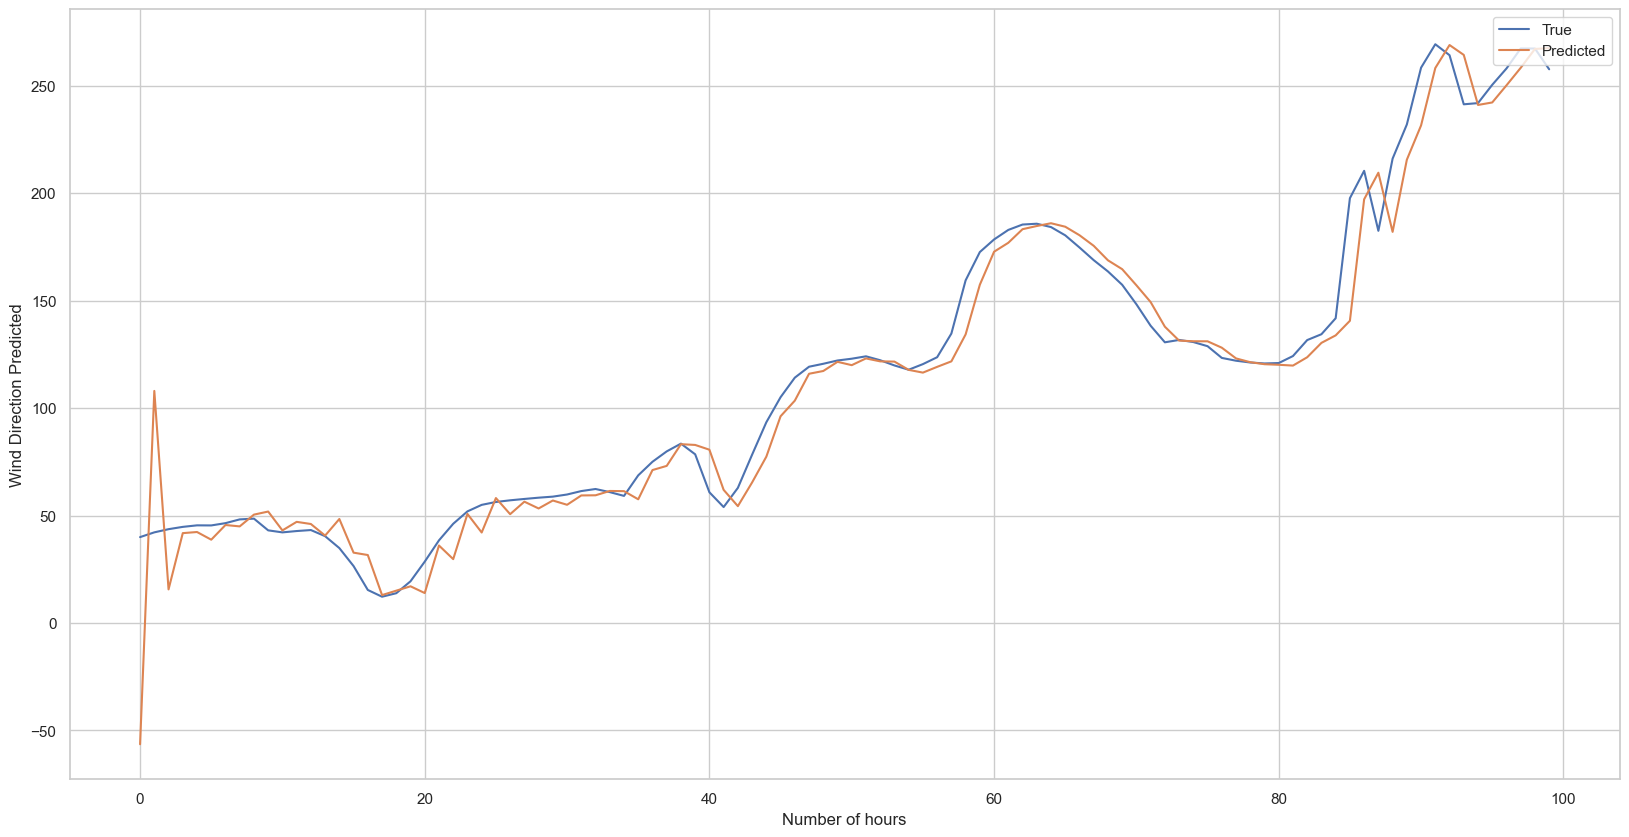

In [33]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Wind Direction Predicted")
pyplot.show()

In [41]:
import pickle 

In [42]:
Pkl_Filename = "Forcasting_WindDirection.pkl" 

In [43]:
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(lstm_model, file)

In [44]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model